# Python coding challenge: Optimization of 2nd Order PDE Function

Below is a segment of original code written in Python 3. The problem presented here is an iterative solution to a 2nd order partial differential equation (PDE). The code presented below works as expected, however the total time to complete the operations is not ideal. 

## Model 1:

In [104]:
import numpy as np   
 
def f1(x,y):  
    return (-2*np.pi**2)*np.sin(np.pi*x)*np.sin(np.pi*y)  
  
def f1t(x,y):  
    return (np.sin(np.pi*x)*np.sin(np.pi*y))  
 
def five_point(grid,i,j,h,grid_x,grid_y):  
    return ((grid[i+1,j]+grid[i-1,j]+grid[i,j+1]
             +grid[i,j-1])/4 - ((h**2)/4)*f1(grid_x[i,0],grid_y[0,j]))  
    
def five_point_fin_int1(X=np.ones(1),Y=np.ones(1),
                        n_x=32,K_max=100, tol=0.0001,tol_type="grid"):  
    import time;  t0 = time.clock()  

    h = 1/n_x  
    X_max = int(X/h)  
    Y_max = int(Y/h)  
  
    grid_x, grid_y = np.mgrid[0:X+h:h, 0:Y+h:h]  
    grid_true = np.zeros((X_max+1,Y_max+1))  
    for i in range(1,X_max):  
        for j in range(1,Y_max):  
            grid_true[i,j] = f1t(grid_x[i,0],grid_y[0,j])  
  
    grid = np.zeros((X_max+1,Y_max+1))  
    grid_err = np.zeros((X_max+1,Y_max+1))  
  
    count = 0  
    tol_max = False      
    while ((count < K_max) & (tol_max == False)):  
        count += 1  
        for i in range(1,X_max):  
            for j in range(1,Y_max):  
                grid[i,j] = five_point(grid,i,j,h,grid_x,grid_y)  
                
                grid_err[i,j] = (grid[i,j] - grid_true[i,j])  
        
                if (tol_type.lower() == "grid"):  
                    if (np.amax(abs(grid_err)) < tol):  
                        tol_max = True  
                else:  
                    if (abs(np.linalg.norm(grid)-np.linalg.norm(grid_true)) < tol):  
                        tol_max = True  
    
    cpu_time = time.clock() - t0  
    
    #return np.array(grid) #for 3D plotting
    print("Iterations: ", count)  
    print("CPU time: ", cpu_time)  
    print("Tolerance Max reached: ", tol_max)  
    print("Maximum error: ", np.amax(abs(grid_err)))

In [114]:
five_point_fin_int1(X=np.ones(1),Y=np.ones(1),
                    n_x=32,K_max=100, tol=0.0001,tol_type="grid")

Iterations:  100
CPU time:  4.180964600000152
Tolerance Max reached:  False
Maximum error:  0.3815212564766364


**Plotting the grid:** 

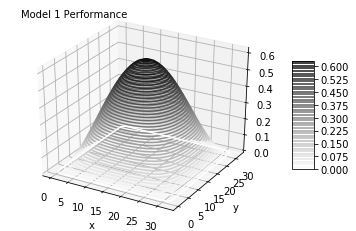

In [103]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.cm import coolwarm
import matplotlib.pyplot as plt
import numpy as np
# defining variables
x = np.linspace(0, 32, 33)
y = np.linspace(0, 32, 33)
X, Y = np.meshgrid(x, y)
Z1 = five_point_fin_int1(X=np.ones(1),Y=np.ones(1),
                         n_x=32,K_max=100, tol=0.0001,tol_type="grid")

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
# Use X and T arrays to plot u 
# shape of X, T and u must to be the same
# but shape of u is [40,1601] and I will skip last row while plotting
surf = ax.contour3D(X, Y, Z1, 50, cmap='binary')

fig.colorbar(surf, shrink=0.5, aspect=5)
ax.text2D(0.05, 0.95, "Model 1 Performance", transform=ax.transAxes)
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.show()

## Assignment:
**Question 1:**	The optimized code. The results generated should match that of the original within a certain margin of error.

**Question 2:**	An explanation of your solution. Why did you choose this particular method? What results did you anticipate? Answer these types of questions briefly in one to two paragraphs. This explanation should be a high-level summary of the logic and reasoning behind the solution.

**Question 3:**	In-line code citations. Comment your final code to indicate what has been changed and your reasoning at each step. If you include any additional libraries or modules, cite their origin and the reasoning behind their selection.

## Model 2:

In [115]:
def five_point_fin_int2(X=np.ones(1),Y=np.ones(1),
                        n_x=32,K_max=100, tol=0.0001,tol_type="grid"):  
    import time;  t0 = time.clock()  
  
    h = 1/n_x  
    X_max = int(X/h)  
    Y_max = int(Y/h)  
  
    grid_x, grid_y = np.mgrid[0:X+h:h, 0:Y+h:h]  
    grid_true = np.zeros((X_max+1,Y_max+1))  
    '''
    The loop for grid_true is changed to vectorization. 
    In vectorization, instead of applying 
    the function five_point on each elements in the grid_true,
    the five_point function are applied to whole arrays.
    '''
    grid_true[1:X_max,1:Y_max]=f1t(*np.meshgrid(
        grid_x[1:X_max,0], grid_y[0,1:Y_max]))
    
    grid = np.zeros((X_max+1,Y_max+1))  
    grid_err = np.zeros((X_max+1,Y_max+1))  
  
    count = 0  
    tol_max = False 
    
    while ((count < K_max) & (tol_max == False)):  
        count += 1  
        '''
        The loop for grid and grid_err is changed to vectorization. 
        In vectorization, instead of applying 
        the function five_point on each elements in the two grids,
        the five_point function are applied to whole arrays.
        '''
        grid[1:X_max, 1:Y_max] = five_point(grid, 
            *np.meshgrid(np.arange(1,X_max), np.arange(1, Y_max)), 
                                                        h, grid_x, grid_y) 
        grid_err[1:X_max, 1:Y_max] = (grid[1:-1,1:-1] - grid_true[1:-1,1:-1])  
        
        if (tol_type.lower() == "grid"):
            if (np.amax(abs(grid_err)) < tol):  
                tol_max = True  
            
        else:  
            if (abs(np.linalg.norm(grid)-np.linalg.norm(grid_true)) < tol):  
                tol_max = True 
    
    cpu_time = time.clock() - t0  
    
    #return np.array(grid) #for 3D plotting
    print("Iterations: ", count)  
    print("CPU time: ", cpu_time)  
    print("Tolerance Max reached: ", tol_max) 
    print("Maximum error: ", np.amax(abs(grid_err)))
    

This code took 3 seconds to run, which can definitely be reduced by fixing the internal structure of the code. After carefully reviewing the code, I found that the loops for grid_true, grid and grid error are the cause for long CPU time since they takes many iterations. There should be a better way to update the values in those grid matrixes. After some considerations and trials, I found that I can update the the numpy packages allow the replacement of loop through vectorization. 

Vectorization is the process of rewriting a loop so that it processes 33 elements of the array simultaneously instead of processing a single element of an array. Therefore, it can reduce the speed sinificantly.  In my code, I replaced all the loop of grid_true, grid and grid_err with vectoriaztion. I expected that the change would reduce the CPU time and still achieve a result should match the result of original pde function. After several errors on dimension mismatch and many debugging trials, I eventually come up with a function that works without any bugs.

In [46]:
five_point_fin_int2(X=np.ones(1),Y=np.ones(1),
                    n_x=32,K_max=100, tol=0.0001,tol_type="grid")

Iterations:  100
CPU time:  0.05042359999970358
Tolerance Max reached:  False
Maximum error:  0.6168131745891818


After running the code and print out the metric outputs, I decided to plot the new side by side with the original grid using matplotlib and mpl_toolkits. Below is the 3d visualization. 

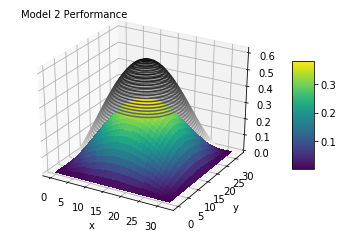

In [89]:
# defining variables
x = np.linspace(0, 32, 33)
y = np.linspace(0, 32, 33)
X, Y = np.meshgrid(x, y)
Z1 = five_point_fin_int1(X=np.ones(1),Y=np.ones(1),
                         n_x=32,K_max=100, tol=0.0001,tol_type="grid")
Z2 = five_point_fin_int2(X=np.ones(1),Y=np.ones(1),
                         n_x=32,K_max=100, tol=0.0001,tol_type="grid")
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
# Use X and T arrays to plot u 
# shape of X, T and u must to be the same
# but shape of u is [40,1601] and I will skip last row while plotting
surf = ax.contour3D(X, Y, Z1, 50, cmap='binary')
surf = ax.plot_surface(X, Y, Z2, rstride=1, cstride=1, 
                       cmap='viridis', linewidth=0, antialiased=False)
fig.colorbar(surf, shrink=0.5, aspect=5)
ax.text2D(0.05, 0.95, "Model 2 Performance", transform=ax.transAxes)
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.show()

**Performance evaluation:**

In [116]:
cpucompare = abs(4.180964600000152-0.05042359999970358)/4.180964600000152*100
print("The CPU time of the modified PDE function decreases %.2f" 
      %cpucompare + "% compare to the original function")
errorcompare = abs(0.3815212564766364-0.6168131745891818)/0.3815212564766364*100
print("The error of the modified PDE function increases %.2f" 
      %errorcompare + "% compare to the original function")

The CPU time of the modified PDE function decreases 98.79% compare to the original function
The error of the modified PDE function increases 61.67% compare to the original function


The CPU time does reduced significantly using vectorization. However, the error also increases by 61.67%. Therefore, there is a speed-accuracy tradeoff. It is a tradeoff between how fast a task can be performed and how many mistakes are made in performing the task. Therefore, the method of vectorization does increase the speed but it is not as accurate as the original function. In the next section, I will improve the performance of the second model. 

## Model 3:

In my code, I still use the the method of vectorization. However, I only replaced the loops of grid_true, grid_err with vectoriaztion. I still keep the loop of the grid because it performs better than the vectorization version. I expected that the change would reduce the CPU time and still achieve a result should match the result of original pde function. 

In [117]:
def five_point_fin_int3(X=np.ones(1),Y=np.ones(1),
                        n_x=32,K_max=100, tol=0.0001,tol_type="grid"):  
    import time;  t0 = time.clock()  
  
    h = 1/n_x  
    X_max = int(X/h)  
    Y_max = int(Y/h)  
  
    grid_x, grid_y = np.mgrid[0:X+h:h, 0:Y+h:h]  
    grid_true = np.zeros((X_max+1,Y_max+1))  
    '''
    The loop for grid_true is changed to vectorization. 
    In vectorization, instead of applying 
    the function five_point on each elements in the grid_true,
    the five_point function are applied to whole arrays.
    '''
    grid_true[1:X_max,1:Y_max]=f1t(*np.meshgrid(
        grid_x[1:X_max,0], grid_y[0,1:Y_max]))
    
    grid = np.zeros((X_max+1,Y_max+1))  
    grid_err = np.zeros((X_max+1,Y_max+1))  
  
    count = 0  
    tol_max = False 
    
    '''
    The loop for grid_err is changed to vectorization. 
    In vectorization, instead of applying 
    the function five_point on each elements in the grid_err,
    the five_point function are applied to whole arrays.
    '''
    while ((count < K_max) & (tol_max == False)):  
        count += 1  
        for i in range(1,X_max):  
            for j in range(1,Y_max):  
                grid[i,j] = five_point(grid,i,j,h,grid_x,grid_y) 
        grid_err[1:X_max, 1:Y_max] = (grid[1:-1,1:-1] - grid_true[1:-1,1:-1])  
        
        if (tol_type.lower() == "grid"):
            if (np.amax(abs(grid_err)) < tol):  
                tol_max = True  
            
        else:  
            if (abs(np.linalg.norm(grid)-np.linalg.norm(grid_true)) < tol):  
                tol_max = True 
    
    cpu_time = time.clock() - t0  
    
    #return np.array(grid) #for 3D plotting
    print("Iterations: ", count)  
    print("CPU time: ", cpu_time)  
    print("Tolerance Max reached: ", tol_max) 
    print("Maximum error: ", np.amax(abs(grid_err)))

In [123]:
five_point_fin_int3(X=np.ones(1),Y=np.ones(1),
                    n_x=32,K_max=100, tol=0.0001,tol_type="grid")

Iterations:  100
CPU time:  1.4596399000001838
Tolerance Max reached:  False
Maximum error:  0.3815212564766364


In [124]:
cpucompare = abs(4.180964600000152-1.4596399000001838)/4.180964600000152*100
print("The CPU time of the modified PDE function decreases %.2f" 
      %cpucompare + "% compare to the original function")
errorcompare = abs(0.3815212564766364-0.3815212564766364)/0.3815212564766364*100
print("The error of the modified PDE function increases %.2f" 
      %errorcompare + "% compare to the original function")

The CPU time of the modified PDE function decreases 65.09% compare to the original function
The error of the modified PDE function increases 0.00% compare to the original function


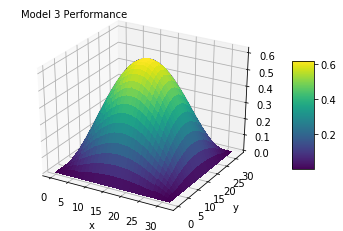

In [87]:
# defining variables
x = np.linspace(0, 32, 33)
y = np.linspace(0, 32, 33)
X, Y = np.meshgrid(x, y)
Z1 = five_point_fin_int1(X=np.ones(1),Y=np.ones(1),
                         n_x=32,K_max=100, tol=0.0001,tol_type="grid")
Z3 = five_point_fin_int3(X=np.ones(1),Y=np.ones(1),
                         n_x=32,K_max=100, tol=0.0001,tol_type="grid")
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
# Use X and T arrays to plot u 
# shape of X, T and u must to be the same
# but shape of u is [40,1601] and I will skip last row while plotting
surf = ax.contour3D(X, Y, Z1, 50, cmap='binary')
surf = ax.plot_surface(X, Y, Z3, rstride=1, cstride=1, 
                       cmap='viridis', linewidth=0, antialiased=False)
fig.colorbar(surf, shrink=0.5, aspect=5)
ax.text2D(0.05, 0.95, "Model 3 Performance", transform=ax.transAxes)
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.show()

The CPU time does reduced significantly using vectorization and it has the same accuracy as the original model. Therefore, the method of combining both vectorization has the best performace of all three models. This is the model that we are looking for.